# Notebook used for EDA of the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [12]:
data_path = '/home/jovyan/work/data/train.csv'
df = pd.read_csv(data_path)

# Basic Understanding of the Data

In [13]:
#Get Shape of Data
df.shape

(891, 12)

In [14]:
#Get column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
# Get the first 5 rows of data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In this dataset the ? is used for NA values.  I am going to replace ? with NaN to better use some pandas and numpy functions.

In [17]:
df = df.replace(['?'],np.nan)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ID Categorical Data and Continous Data types along with Data Issues

In [19]:
# ID numerical data and if data is categorical or continous in nature
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


While it jumps out to me that age and fare are not being seen as numerical data, I think I will deal with this a bit later.  Right now I am just going to ID categorial and continous data.  

In [20]:
num_cols = ['Pclass', 'Survived', 'SibSp', 'Parch']
for col in num_cols:
    print(f'Value Count for {col}')
    print(df[col].value_counts())
    print('----')

Value Count for Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
----
Value Count for Survived
0    549
1    342
Name: Survived, dtype: int64
----
Value Count for SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
----
Value Count for Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
----


The pclass and survived fields are categocial in nature while the sibsp and parch are continous.  Now to deal with the fare and age issues.  First lets examine age.

## Examine Age

In [27]:
df.Age = df.Age.astype(float)

<Figure size 576x576 with 0 Axes>

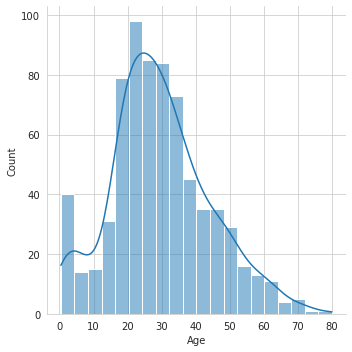

In [21]:
plt.figure(figsize=(8,8))
sns.displot(df['Age'], kde=True)

<AxesSubplot:ylabel='Age'>

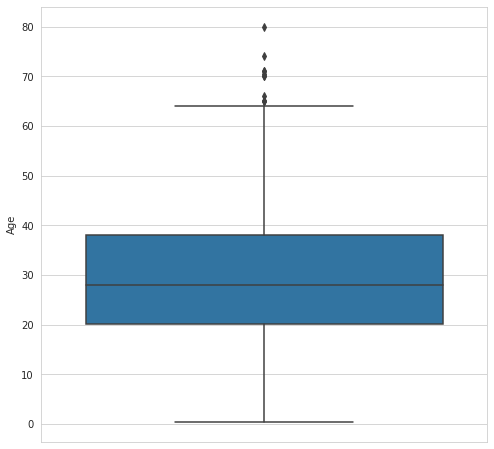

In [22]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df["Age"])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

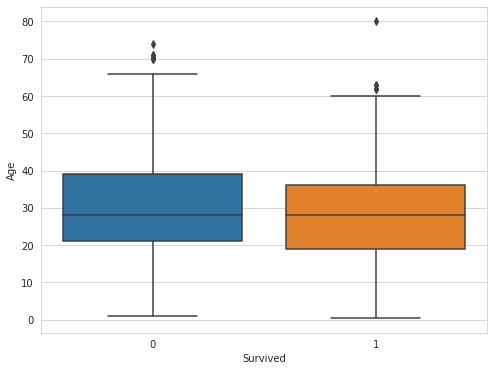

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived',y='Age',data=df)

In [24]:
na_count = df['Age'].isna().sum()
print(f'Number of NA values is {na_count}')
na_percent = (na_count/df['Survived'].count())
print(f'NA values percent is {na_percent}')

Number of NA values is 177
NA values percent is 0.19865319865319866


In [25]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

About 20% of the age variable is missing from this dataset.  In order to better understand if I should drop the missing or impute the missing values I need to explore this variable more.

I think for the training dataset instead of simply using a median or mean replacment I will add a column for median, mean, and add columns for both deterministic regression imputation as well as stochastic regression imputation from there we can train and compare the models to see which performs the best.  Before I can do this I need to finish cleaning the data.

## Examine Fare

In [28]:
df.Fare= df.Fare.astype(float)

<Figure size 576x432 with 0 Axes>

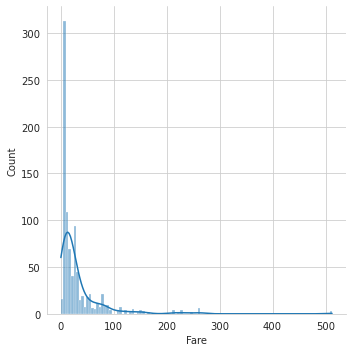

In [29]:
plt.figure(figsize=(8,6))
sns.displot(df['Fare'], kde=True)

<AxesSubplot:ylabel='Fare'>

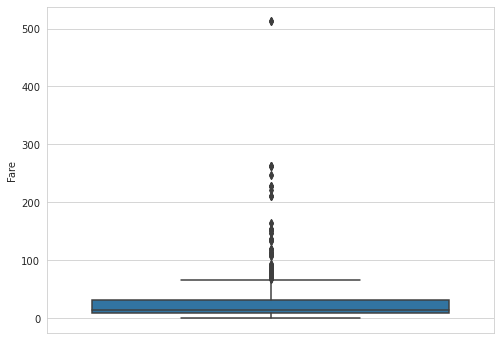

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df["Fare"])

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

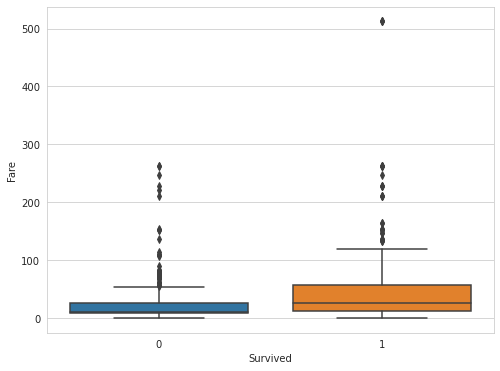

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived',y='Fare',data=df)

In [34]:
na_count = df['Fare'].isna().sum()
print(f'Number of NA values is {na_count}')
na_percent = (na_count/df['Survived'].count())
print(f'NA values percent is {na_percent}')

Number of NA values is 0
NA values percent is 0.0


In [35]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [36]:
df['Fare'].median()

14.4542

## Examine Pclass

In [38]:
df['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

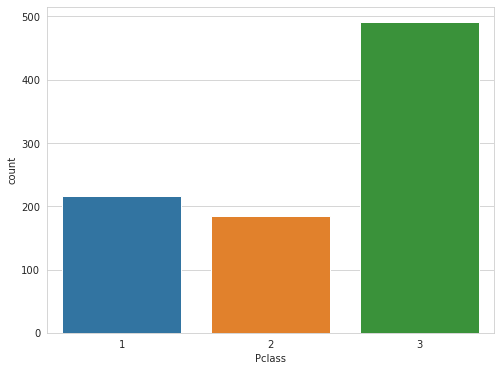

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Pclass', data = df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

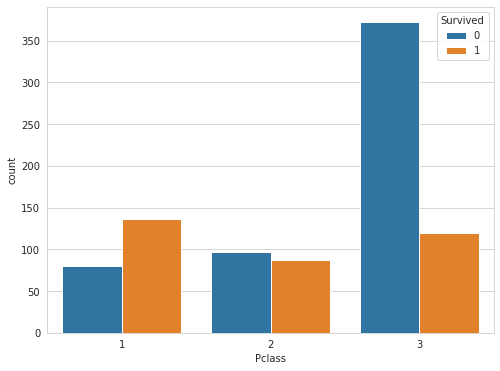

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)

In [44]:
na_count = df['Pclass'].isna().sum()
print(f'Number of NA values is {na_count}')
na_percent = (na_count/df['Survived'].count())
print(f'NA values percent is {na_percent}')

Number of NA values is 0
NA values percent is 0.0


## Examine Sex

In [45]:
df['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

<AxesSubplot:xlabel='Sex', ylabel='count'>

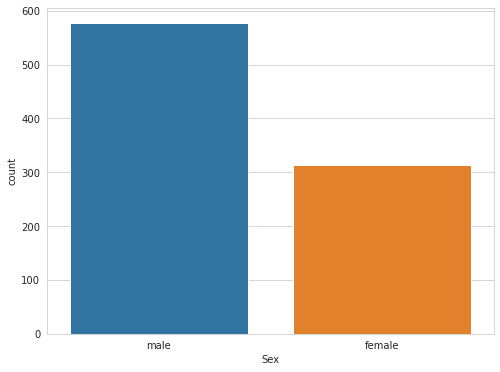

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Sex', data = df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

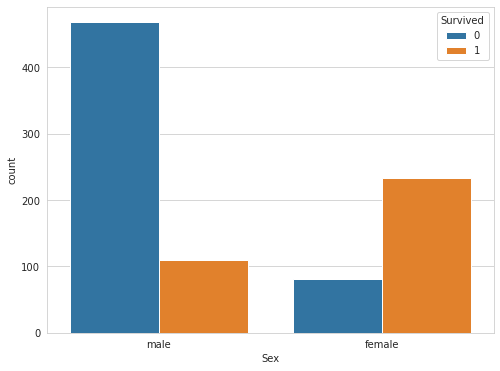

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Sex', hue = 'Survived', data = df)

In [48]:
na_count = df['Sex'].isna().sum()
print(f'Number of NA values is {na_count}')
na_percent = (na_count/df['Survived'].count())
print(f'NA values percent is {na_percent}')

Number of NA values is 0
NA values percent is 0.0


## Examine Sibsp

In [49]:
df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

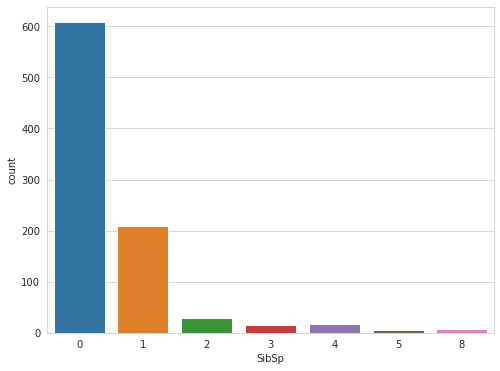

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'SibSp', data = df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

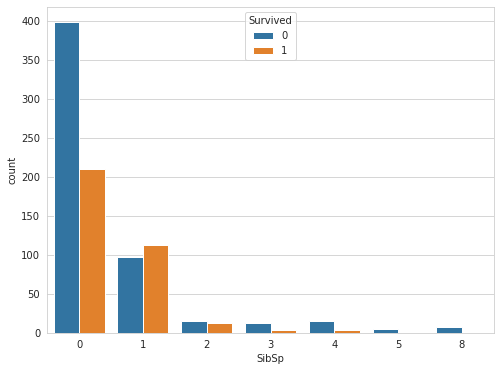

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'SibSp', hue = 'Survived', data = df)

In [52]:
na_count = df['SibSp'].isna().sum()
print(f'Number of NA values is {na_count}')
na_percent = (na_count/df['SibSp'].count())
print(f'NA values percent is {na_percent}')

Number of NA values is 0
NA values percent is 0.0


## Examine Parch

In [53]:
df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

<AxesSubplot:xlabel='Parch', ylabel='count'>

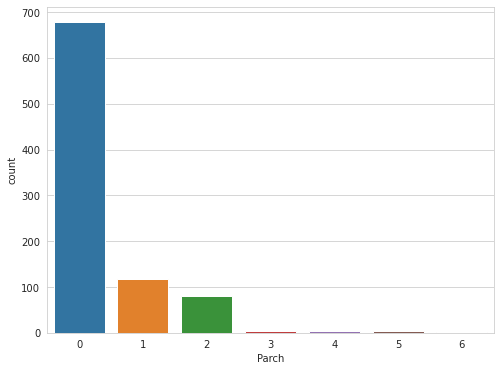

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Parch', data = df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

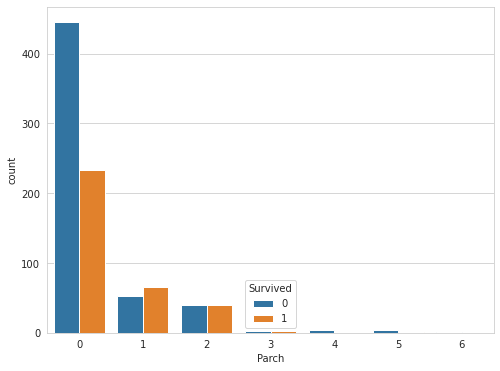

In [56]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Parch', hue = 'Survived', data = df)

In [41]:
na_count = df['parch'].isna().sum()
print(f'Number of NA values is {na_count}')
na_percent = (na_count/df['parch'].count())
print(f'NA values percent is {na_percent}')

Number of NA values is 0
NA values percent is 0.0


## Examine Ticket

In [57]:
df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [58]:
df['Ticket'].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [59]:
na_count = df['Ticket'].isna().sum()
print(f'Number of NA values is {na_count}')
na_percent = (na_count/df['Survived'].count())
print(f'NA values percent is {na_percent}')

Number of NA values is 0
NA values percent is 0.0


## Examine Cabin

In [60]:
df['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [61]:
df['Cabin'].head(20)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: Cabin, dtype: object

In [64]:
na_count = df['Cabin'].isna().sum()
print(f'Number of NA values is {na_count}')
na_percent = (na_count/df['Survived'].count())
print(f'NA values percent is {na_percent}')

Number of NA values is 687
NA values percent is 0.7710437710437711


<font size="4">This initially appeared to be an interesting feature.  However; due to the number of missing values it will be best to drop this feature and not try to use it for training the model</font>

<font size="4">It appears that this feature only relates to if a body was recovered and as such will not have any value as a predictor of a person being able to survive.  As such this feature will be removed from the training dataset</font>

<font size="4">Due to the number of unique values and the formatting, I will remove this feature from the model for training</font>

## Examine Embarked

In [69]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

<AxesSubplot:xlabel='Embarked', ylabel='count'>

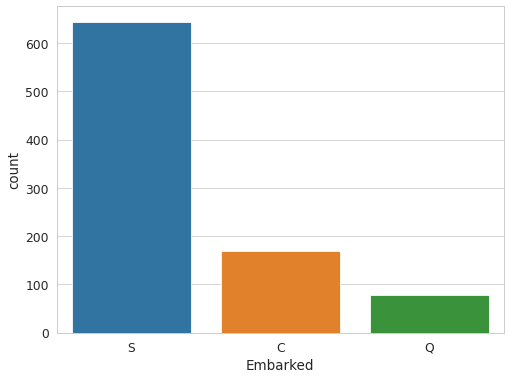

In [70]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Embarked', data = df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

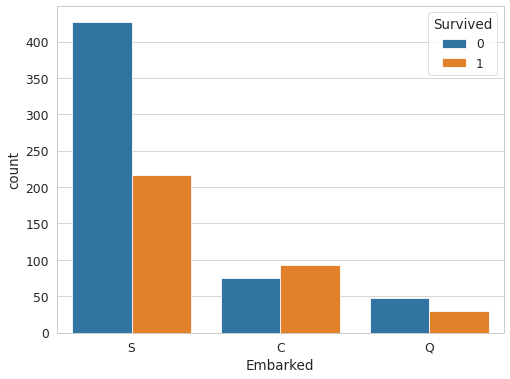

In [71]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Embarked', hue = 'Survived', data = df)

In [75]:
na_count = df['Embarked'].isna().sum()
print(f'Number of NA values is {na_count}')
na_percent = (na_count/df['Survived'].count())
print(f'NA values percent is {na_percent}')

Number of NA values is 2
NA values percent is 0.002244668911335578


## Data Removal and Preprocessing

I am going to remove the name, home.dest, body, boat, embarked, cabin, and ticket variables.

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
drop_list = ['Name', 'Ticket', 'Cabin']
df = df.drop(drop_list, 1)
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


<AxesSubplot:>

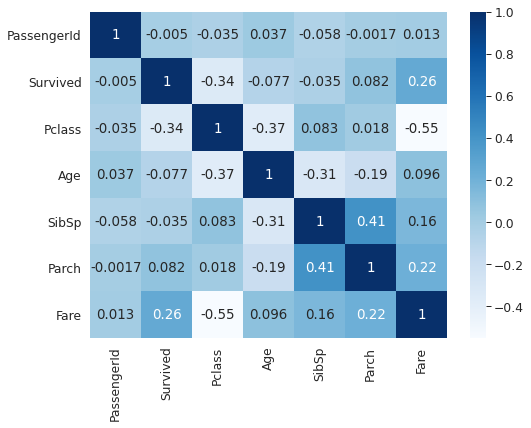

In [67]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
df_mx = df.corr()
sns.heatmap(df_mx, annot=True, cmap='Blues')

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

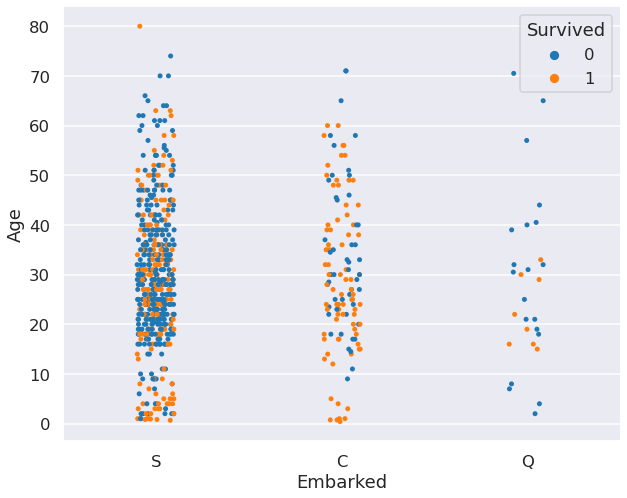

In [72]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.set_context('talk')
sns.stripplot(x='Embarked',y='Age',data=df, hue='Survived')